In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

### Test 1 Keeping Classification Head Fixed and Retrain Body

Epoch 1/5
1500/1500 [==============================] - 9s 6ms/step - loss: 1.2021 - acc: 0.5874 - val_loss: 0.5957 - val_acc: 0.8152
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4964 - acc: 0.8487 - val_loss: 0.3496 - val_acc: 0.8970
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3549 - acc: 0.8910 - val_loss: 0.2812 - val_acc: 0.9146
Epoch 4/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2951 - acc: 0.9081 - val_loss: 0.2609 - val_acc: 0.9194
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2591 - acc: 0.9189 - val_loss: 0.2595 - val_acc: 0.9193


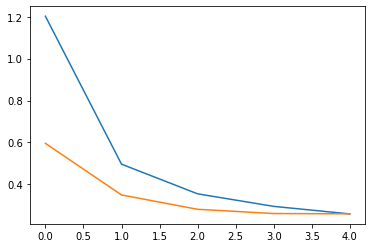

acc test:  0.9208
check same 0.15028739


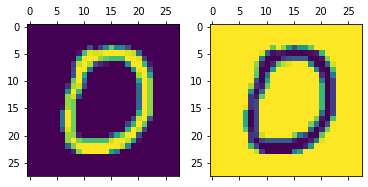

inverted colors acc test:  0.1179
Epoch 1/5
1500/1500 [==============================] - 9s 6ms/step - loss: 1.4274 - acc: 0.5439 - val_loss: 0.8631 - val_acc: 0.7592
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.6916 - acc: 0.8119 - val_loss: 0.4931 - val_acc: 0.8736
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4620 - acc: 0.8737 - val_loss: 0.4483 - val_acc: 0.8611
Epoch 4/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3741 - acc: 0.8945 - val_loss: 0.3796 - val_acc: 0.8876
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3272 - acc: 0.9056 - val_loss: 0.2936 - val_acc: 0.9147


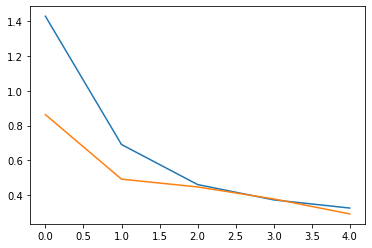

acc test:  0.914
check same 0.15028739


In [31]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import backend as K

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")


def features(input_shape):
    inp = layers.Input(input_shape)
    c1 = layers.Conv2D(32,(3,3),activation='relu',padding='same')(inp)
    c1 = layers.MaxPooling2D((2,2))(c1)
    c1 = layers.Conv2D(64,(3,3),activation='relu',padding='same')(c1)
    c1 = layers.MaxPooling2D((2,2))(c1)
    c1 = layers.GlobalAveragePooling2D()(c1)
    feature_extract = models.Model(inp,c1)
    return feature_extract
    
def make_clf(input_shape):
    feats = layers.Input(input_shape)
    out1  = layers.Dense(64,activation='relu')(feats)
    out   = layers.Dense(10,activation='softmax')(out1)
    classifier = models.Model(feats,out)
    return classifier
    
    
def assemble_model(body, head):
    inp  = layers.Input(K.int_shape(body.input)[1:])
    feats= body(inp)
    clf  = head(feats)
    merged = models.Model(inp,clf)
    return merged
    
x_train = x_train/255
x_test = x_test/255

y_oh_train = tf.keras.utils.to_categorical(y_train)
y_oh_test  = tf.keras.utils.to_categorical(y_test)

body1 = features((28,28,1))
body2 = features((28,28,1))

head = make_clf((64))
m1 = assemble_model(body1, head)

m1.compile('adam',loss='categorical_crossentropy',metrics=['acc'])
h = m1.fit(x_train, y_oh_train,validation_split=.2,epochs=20)
plt.figure()
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.show()
y_pred_test = np.argmax(m1.predict(x_test),axis=-1)
print('acc test: ',np.mean(y_pred_test==y_test))
print('check same',np.mean(np.abs(head.layers[1].get_weights()[0])))

fig,ax = plt.subplots(ncols=2)
ax[0].matshow(x_test[10])

# invert black and white
x_test = np.abs(x_test-1)
x_train = np.abs(x_train-1)

ax[1].matshow(x_test[10])
plt.show()

y_pred_test = np.argmax(m1.predict(x_test),axis=-1)
print('inverted colors acc test: ',np.mean(y_pred_test==y_test))



head.trainable = False
m2 = assemble_model(body2, head)
m2.compile('adam',loss='categorical_crossentropy',metrics=['acc'])
h = m2.fit(x_train, y_oh_train,validation_split=.2,epochs=5)
plt.figure()
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.show()
y_pred_test = np.argmax(m2.predict(x_test),axis=-1)
print('acc test: ',np.mean(y_pred_test==y_test))
print('check same',np.mean(np.abs(head.layers[1].get_weights()[0])))





### Test2: But makes it sense?
The question is: Can we train the network with less data, if the head was pretrained.
Hard to evaluate: 
- The domain adapted model is restricted by the training of the head. So we need a really powerfull head before training the body.
- For a statistical solid test we should train multiple heads.

Epoch 1/20
781/781 [==============================] - 10s 13ms/step - loss: 1.7826 - acc: 0.3311 - val_loss: 1.5061 - val_acc: 0.4457
Epoch 2/20
781/781 [==============================] - 10s 13ms/step - loss: 1.2070 - acc: 0.5852 - val_loss: 0.9854 - val_acc: 0.6696
Epoch 3/20
781/781 [==============================] - 10s 13ms/step - loss: 0.8627 - acc: 0.7193 - val_loss: 0.7574 - val_acc: 0.7522
Epoch 4/20
781/781 [==============================] - 10s 13ms/step - loss: 0.6668 - acc: 0.7891 - val_loss: 0.6573 - val_acc: 0.7840
Epoch 5/20
781/781 [==============================] - 10s 13ms/step - loss: 0.5601 - acc: 0.8262 - val_loss: 0.5330 - val_acc: 0.8343
Epoch 6/20
781/781 [==============================] - 10s 13ms/step - loss: 0.4903 - acc: 0.8484 - val_loss: 0.4517 - val_acc: 0.8637
Epoch 7/20
781/781 [==============================] - 10s 13ms/step - loss: 0.4434 - acc: 0.8596 - val_loss: 0.4366 - val_acc: 0.8704
Epoch 8/20
781/781 [==============================] - 10s 13ms

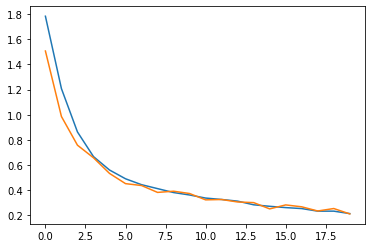

acc test:  0.9481
check same 0.17521082


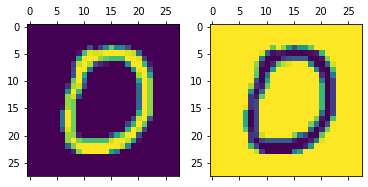

inverted colors acc test:  0.1058


In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm.keras import TqdmCallback
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")


def features(input_shape):
    inp = layers.Input(input_shape)
    c1 = layers.Conv2D(32,(3,3),activation='relu',padding='same')(inp)
    c1 = layers.MaxPooling2D((2,2))(c1)
    c1 = layers.Conv2D(64,(3,3),activation='relu',padding='same')(c1)
    c1 = layers.MaxPooling2D((2,2))(c1)
    c1 = layers.GlobalAveragePooling2D()(c1)
    feature_extract = models.Model(inp,c1)
    return feature_extract
    
def make_clf(input_shape):
    feats = layers.Input(input_shape)
    out1  = layers.Dense(64,activation='relu')(feats)
    out   = layers.Dense(10,activation='softmax')(out1)
    classifier = models.Model(feats,out)
    return classifier
    
    
def assemble_model(body, head):
    inp  = layers.Input(K.int_shape(body.input)[1:])
    feats= body(inp)
    clf  = head(feats)
    merged = models.Model(inp,clf)
    return merged
    
x_train = x_train/255
x_test = x_test/255
batch_size = 64
y_oh_train = tf.keras.utils.to_categorical(y_train)
y_oh_test  = tf.keras.utils.to_categorical(y_test)

body1 = features((28,28,1))


head = make_clf((64))
m1 = assemble_model(body1, head)

m1.compile('adam',loss='categorical_crossentropy',metrics=['acc'])
shift = .2
gen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift,rotation_range=20)
train_samples = np.random.choice(60000,replace=False,size=50000)
valid_samples = np.setdiff1d(np.arange(60000),train_samples)
train_gen = gen.flow(x_train[train_samples,:,:,np.newaxis],y_oh_train[train_samples])
valid_gen = gen.flow(x_train[valid_samples,:,:,np.newaxis],y_oh_train[valid_samples])

h = m1.fit(train_gen,validation_data=valid_gen,
           epochs=20,verbose=1,callbacks=[],
           steps_per_epoch = len(train_samples) // batch_size,
           validation_steps = len(valid_samples) // batch_size)

plt.figure()
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.show()
y_pred_test = np.argmax(m1.predict(x_test),axis=-1)
print('acc test: ',np.mean(y_pred_test==y_test))
print('check same',np.mean(np.abs(head.layers[1].get_weights()[0])))

fig,ax = plt.subplots(ncols=2)
ax[0].matshow(x_test[10])

# invert black and white
x_test = np.abs(x_test-1)
x_train = np.abs(x_train-1)

ax[1].matshow(x_test[10])
plt.show()

y_pred_test = np.argmax(m1.predict(x_test),axis=-1)
print('inverted colors acc test: ',np.mean(y_pred_test==y_test))
head.trainable = False

In [ ]:
### Now use the inverted colors and consider them DOMA

Run: 0 iteration with 100 samples


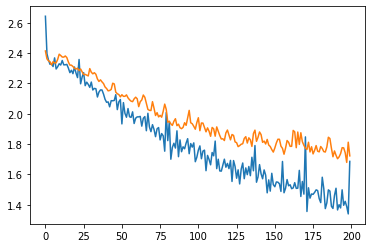

acc test:  0.4417
check same 0.17521082
Run: 0 iteration with 1000 samples


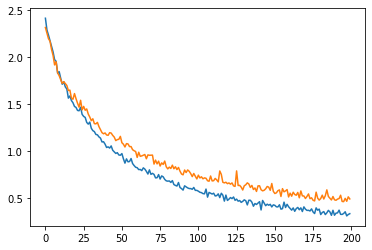

acc test:  0.8698
check same 0.17521082
Run: 0 iteration with 5000 samples


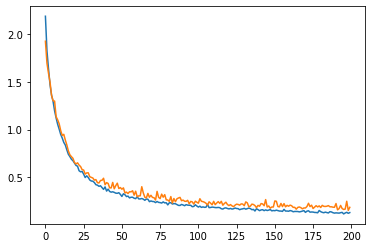

acc test:  0.9471
check same 0.17521082
Run: 0 iteration with 10000 samples


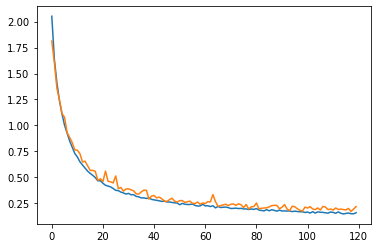

acc test:  0.9387
check same 0.17521082
Run: 1 iteration with 100 samples


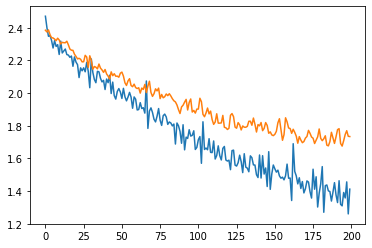

acc test:  0.4427
check same 0.17521082
Run: 1 iteration with 1000 samples


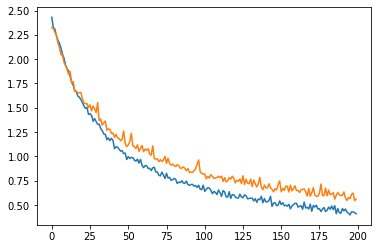

acc test:  0.8407
check same 0.17521082
Run: 1 iteration with 5000 samples


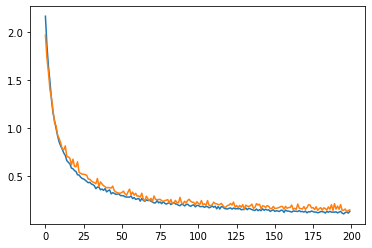

acc test:  0.9524
check same 0.17521082
Run: 1 iteration with 10000 samples


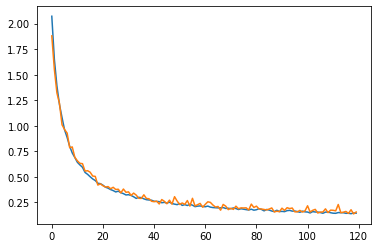

acc test:  0.9492
check same 0.17521082
Run: 2 iteration with 100 samples


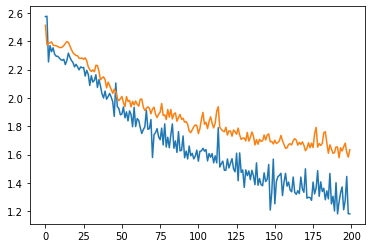

acc test:  0.4504
check same 0.17521082
Run: 2 iteration with 1000 samples


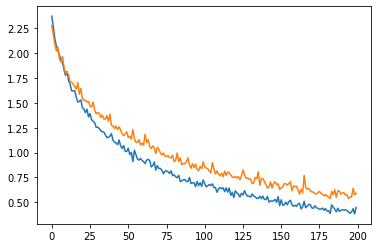

acc test:  0.8536
check same 0.17521082
Run: 2 iteration with 5000 samples


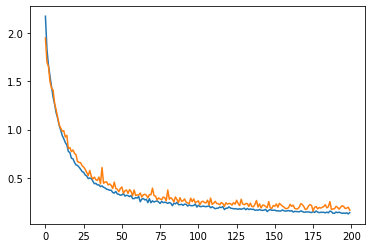

acc test:  0.957
check same 0.17521082
Run: 2 iteration with 10000 samples


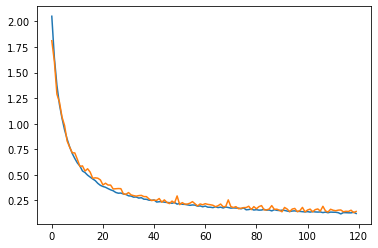

acc test:  0.9545
check same 0.17521082
Run: 3 iteration with 100 samples


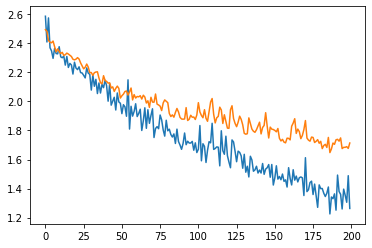

acc test:  0.4334
check same 0.17521082
Run: 3 iteration with 1000 samples


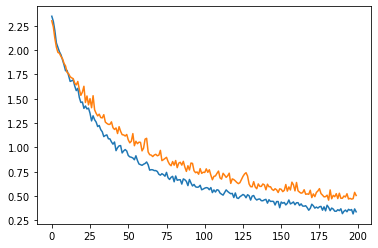

acc test:  0.8743
check same 0.17521082
Run: 3 iteration with 5000 samples


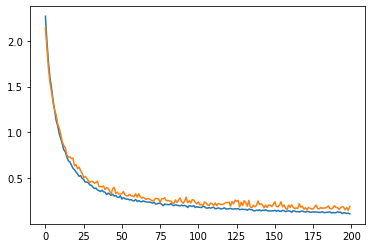

acc test:  0.9549
check same 0.17521082
Run: 3 iteration with 10000 samples


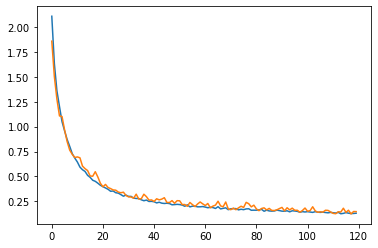

acc test:  0.9523
check same 0.17521082
Run: 4 iteration with 100 samples


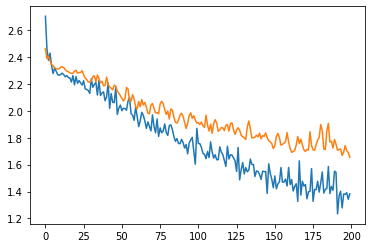

acc test:  0.3514
check same 0.17521082
Run: 4 iteration with 1000 samples


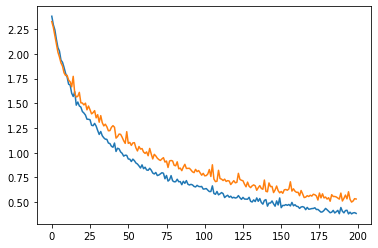

acc test:  0.8597
check same 0.17521082
Run: 4 iteration with 5000 samples


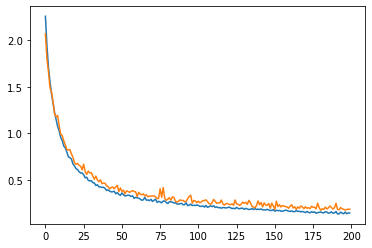

acc test:  0.9526
check same 0.17521082
Run: 4 iteration with 10000 samples


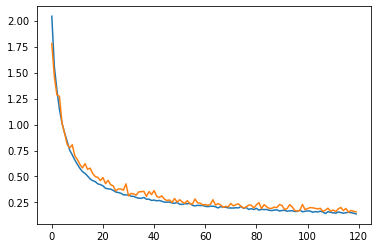

acc test:  0.95
check same 0.17521082
Run: 5 iteration with 100 samples


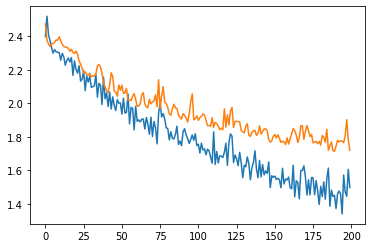

acc test:  0.3529
check same 0.17521082
Run: 5 iteration with 1000 samples


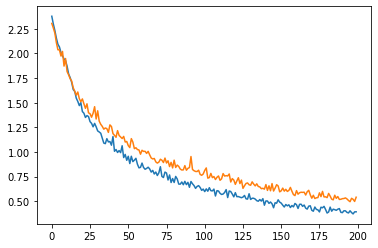

acc test:  0.8778
check same 0.17521082
Run: 5 iteration with 5000 samples


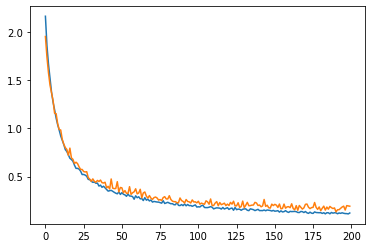

acc test:  0.9436
check same 0.17521082
Run: 5 iteration with 10000 samples


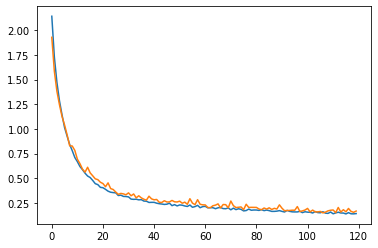

acc test:  0.948
check same 0.17521082
Run: 6 iteration with 100 samples


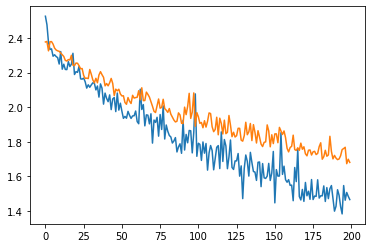

acc test:  0.4155
check same 0.17521082
Run: 6 iteration with 1000 samples


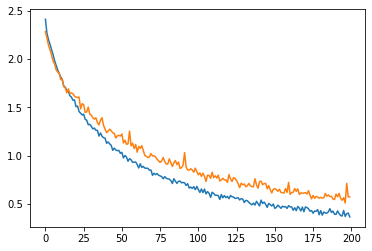

acc test:  0.8562
check same 0.17521082
Run: 6 iteration with 5000 samples


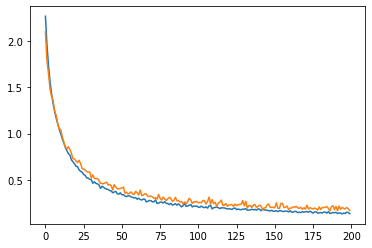

acc test:  0.9459
check same 0.17521082
Run: 6 iteration with 10000 samples


In [ ]:
import tqdm
accs_pretrain  = []
base_epochs    = 20 # epochs with full dataset
num_iterations = 60000*base_epochs
batch_size = 32 # use smaller batch size as same datasets are smaller
# -> taking whole dataset in each step is bad, since every gradient descent looks the same

N_RUNS = 1 # increase N_RUNS if results are very noisy


gen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)

N_RUNS = 10
for run in range(N_RUNS):
    #
    for num_samples in [100,1000,5000,10000]:
        print('Run: {} iteration with {} samples'.format(run,num_samples))
        body2 = features((28,28,1))
        
        m2 = assemble_model(body2, head)
        m2.compile('adam',loss='categorical_crossentropy',metrics=['acc'])
        # maybe change num_epochs w.r.t. num_samples 
        # criterion: number of weight adaptions should be the same for all experiments
        # num_iterations = (samples/batch_size) * num_epochs
        
        # more then T (arbitrary 200) epochs makes no sense -> overfitting
        num_epochs = np.clip(int(num_iterations/num_samples),base_epochs,200)
        
        train_gen = gen.flow(x_train[:num_samples,:,:,np.newaxis],y_oh_train[:num_samples])
        # it is not correct to use the test set during training. -> (Its MNIST, who cares).
        valid_gen = gen.flow(x_test[:1000,:,:,np.newaxis],y_oh_test[:1000])
        h = m2.fit(train_gen,validation_data=valid_gen,
                   epochs=num_epochs,verbose=0,
                   steps_per_epoch = num_samples // batch_size,
                   validation_steps = 1000 // batch_size)
        
        plt.figure()
        plt.plot(h.history['loss'])
        plt.plot(h.history['val_loss'])
        plt.show()
        y_pred_test = np.argmax(m2.predict(x_test),axis=-1)
        acc_test = np.mean(y_pred_test==y_test)
        accs_pretrain += [acc_test]
        print('acc test: ',acc_test)
        print('check same',np.mean(np.abs(head.layers[1].get_weights()[0])))

accs_pretrain = np.reshape(accs_pretrain,(N_RUNS,-1))
plt.figure()
plt.plot(accs_pretrain.mean(axis=0))
plt.show()

In [ ]:
### Compare to Train from Scratch

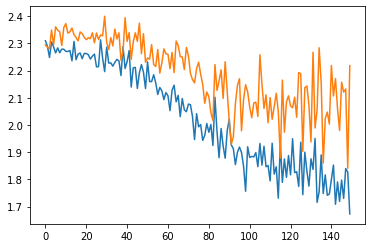

acc test:  0.2627
check same 0.11622603


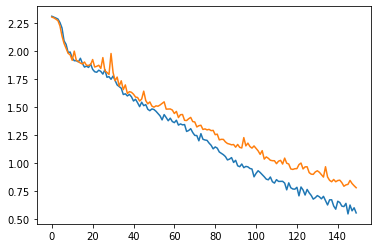

acc test:  0.7732
check same 0.15810421


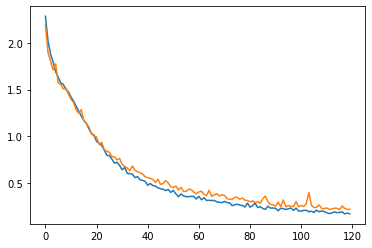

acc test:  0.9413
check same 0.18350436


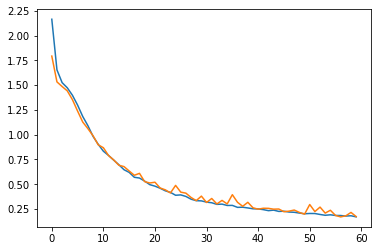

acc test:  0.945
check same 0.20834449


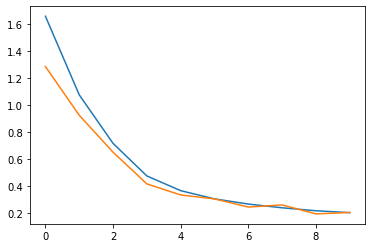

acc test:  0.9423
check same 0.19584945


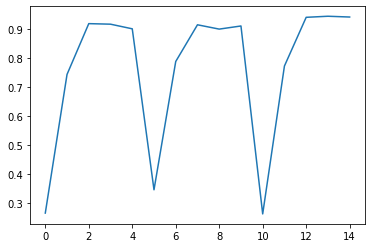

In [30]:

accs_naive = []
from tensorflow.keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)

for run in range(N_RUNS):
    #
    for num_samples in [100,1000,5000,10000,60000]:
        print('Run: {} iteration with {} samples'.format(run,num_samples))
        body2 = features((28,28,1))
        new_head = make_clf((64))
        m2 = assemble_model(body2, new_head)
        m2.compile('adam',loss='categorical_crossentropy',metrics=['acc'])
        # maybe change num_epochs w.r.t. num_samples 
        # criterion: number of weight adaptions should be the same for all experiments
        # num_iterations = (samples/batch_size) * num_epochs
        
        # more then T (arbitrary 100) epochs makes no sense -> overfitting
        num_epochs = np.clip(int(num_iterations/num_samples),5,150)
        
        train_gen = gen.flow(x_train[:num_samples,:,:,np.newaxis],y_oh_train[:num_samples])
        valid_gen = gen.flow(x_test[:1000,:,:,np.newaxis],y_oh_test[:1000])
        h = m2.fit(train_gen,validation_data=valid_gen,
                   epochs=num_epochs,verbose=0,callbacks=[TqdmCallback(verbose=0)],
                   steps_per_epoch = num_samples // batch_size,
                   validation_steps = num_samples // batch_size)
        
        plt.figure()
        plt.plot(h.history['loss'])
        plt.plot(h.history['val_loss'])
        plt.show()
        y_pred_test = np.argmax(m2.predict(x_test),axis=-1)
        acc_test = np.mean(y_pred_test==y_test)
        accs_naive  += [acc_test]
        print('acc test: ',acc_test)
        print('check same',np.mean(np.abs(new_head.layers[1].get_weights()[0])))
accs_naive = np.reshape(accs_naive,(N_RUNS,-1))
plt.figure()
plt.plot(accs_naive.mean(axis=0) )
plt.show()

In [ ]:
qe

## 